<a href="https://colab.research.google.com/github/abhi-11nav/Diabetes-Prediction_/blob/main/Indian_diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 

## Dataset link 

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
dataset_link = "/content/drive/MyDrive/Diabetes Prediction/diabetes.csv"

In [3]:
dataset = pd.read_csv(dataset_link)

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.shape

(768, 9)

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Splitting the data into train and test and preprocessing them differently to avoid data lekage

from sklearn.model_selection import train_test_split

X = dataset.drop("Outcome", axis=1)
y = dataset["Outcome"]


train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=101)

# Combining the features and labels
X = pd.concat([train_X, train_y], axis=1)
y = pd.concat([test_X, test_y], axis=1)

In [9]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
709,2,93,64,32,160,38.0,0.674,23,1
425,4,184,78,39,277,37.0,0.264,31,1
135,2,125,60,20,140,33.8,0.088,31,0
630,7,114,64,0,0,27.4,0.732,34,1
500,2,117,90,19,71,25.2,0.313,21,0


In [10]:
# Checking for any missing values

X.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

 There are no missing values

In [11]:
# Percentage of outputs 

print("0 count: ",np.round(X["Outcome"].value_counts()[0] / len(X["Outcome"]) * 100,2),"\n","1 count:",np.round(X["Outcome"].value_counts()[1] / len(X["Outcome"]) * 100,2))

0 count:  64.66 
 1 count: 35.34


In [12]:
# Importing visualization libraries

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

Text(0, 0.5, 'COUNT')

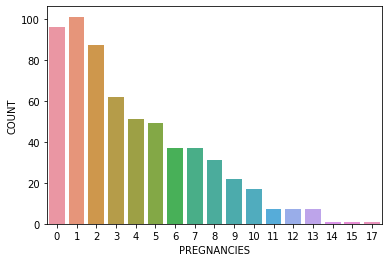

In [13]:
plot = sns.barplot(x=X["Pregnancies"].value_counts().index,  y = X["Pregnancies"].value_counts())
plot.set_xlabel("PREGNANCIES")
plot.set_ylabel("COUNT")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


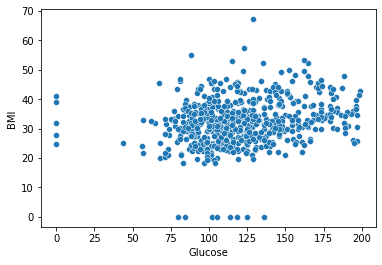

In [14]:
sns.scatterplot(X['Glucose'], X["BMI"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


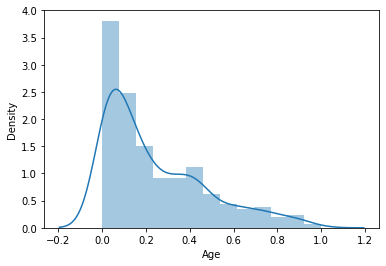

In [18]:
sns.distplot(X["Age"])

In [19]:
# Peforming scaling on train and test data seperately

from sklearn.preprocessing import MinMaxScaler

train_scaler = MinMaxScaler()

test_scaler = MinMaxScaler()

X = pd.DataFrame(train_scaler.fit_transform(X), columns = X.columns)

y = pd.DataFrame(test_scaler.fit_transform(y), columns = y.columns)

In [20]:
# Spllitting into train and validaton test with respect to features and labels 

train_X = X.drop("Outcome", axis=1)
train_y = X["Outcome"]

test_X = y.drop("Outcome", axis=1)
test_y = y["Outcome"]

# MODEL 

In [36]:
# Importing libraries for building model 

import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense, Dropout, InputLayer
from keras.models import Model, Sequential 

In [37]:
# Defining a function to build the model

def build_model(layers = 1, input_shape = [8,], units = 100, count_dr = 1):

  model = keras.models.Sequential()
  model.add(InputLayer(input_shape = input_shape))

  dropout_count = 0

  for layers in range(layers):
    if dropout_count != count_dr:
      model.add(Dense(units, activation="relu"))
      model.add(Dropout(0.4))
    else:
      model.add(Dense(units, activation="relu"))


  model.add(Dense(1, activation="sigmoid"))

  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

  return model

In [49]:
wrapper = keras.wrappers.scikit_learn.KerasClassifier(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
params = {
    "layers":[x for x in range(1,5,1)],
    "units" : [x for x in range(100, 300, 50)]
}

In [52]:
ann_model = RandomizedSearchCV(wrapper, params, n_iter=10, cv=3,scoring="accuracy")

In [53]:
ann_model.fit(train_X, train_y, epochs = 10, validation_data=(test_X, test_y), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/10
13/13 [==============================] - 1s 20ms/step - loss: 0.6872 - accuracy: 0.5477 - val_loss: 0.6645 - val_accuracy: 0.6688
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6704 - accuracy: 0.6333 - val_loss: 0.6488 - val_accuracy: 0.6688
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6644 - accuracy: 0.6357 - val_loss: 0.6405 - val_accuracy: 0.6688
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6563 - accuracy: 0.6357 - val_loss: 0.6349 - val_accuracy: 0.6688
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6430 - val_loss: 0.6298 - val_accuracy: 0.6688
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6415 - accuracy: 0.6333 - val_loss: 0.6244 - val_accuracy: 0.6688
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6391 - accuracy: 0.6333 - val_loss: 0.6193 - val_accuracy: 0.6688
Epoch 8/10
13/13 [=

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f776d42e390>,
                   param_distributions={'layers': [1, 2, 3, 4],
                                        'units': [100, 150, 200, 250]},
                   scoring='accuracy')

In [54]:
ann_model.best_params_

{'units': 200, 'layers': 3}

In [55]:
ann_model.best_score_

0.7377251713693607

In [56]:
model = ann_model.best_estimator_

In [57]:
model.fit(train_X, train_y, epochs = 100, validation_data = (test_X, test_y),callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 0.6730 - accuracy: 0.6401 - val_loss: 0.6351 - val_accuracy: 0.6688
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6512 - accuracy: 0.6482 - val_loss: 0.6084 - val_accuracy: 0.6688
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6299 - accuracy: 0.6629 - val_loss: 0.5748 - val_accuracy: 0.6818
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6089 - accuracy: 0.6857 - val_loss: 0.5420 - val_accuracy: 0.7078
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5940 - accuracy: 0.6726 - val_loss: 0.5277 - val_accuracy: 0.7403
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5766 - accuracy: 0.6954 - val_loss: 0.5016 - val_accuracy: 0.7532
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5541 - accuracy: 0.7264 - val_loss: 0.5235 - val_accuracy: 0.7532
Epoch 8/100


# Saving the model

In [59]:
# Importing pickle library for saving the file in the form of pickle 

import pickle

file = open("ann_model.pkl","wb")

pickle.dump(model, file)